## Assignment on Advanced Machine Learning 
Name: Okaba Mark Ndowobe (191144119)

In [298]:
# import necessary modules and libraries
import numpy as np 
import pandas as pd
from numpy import exp, array, random, dot, log
from itertools import combinations_with_replacement
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Homework-1: Design an artificial neural network model that learns the product of two digits (Digits: 0, 1, 2, 3, 4, 5, 6, 7, 8,9)? For example, if inputs 3 and 2 should find the result as 5.99 with an error of 0.01. You can create the necessary training set for two digits yourself.

 * Generate dataset 

In [299]:
# A Python program to print all combinations 
# with an element-to-itself combination is  
# also included 

X = []
# Get all combinations of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] and length 2 
comb = combinations_with_replacement([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2) 
  
# Print the obtained combinations 
for i in list(comb):
    datum = list(i)
    X.append(datum)

X = log(array(X))
digdf = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': X[:, 0]+X[:, 1]})
digdf = digdf[np.isfinite(digdf['label'])]

* split data into features and labels 

In [300]:
digFeatures = digdf.values[:, 0:2]
digLabels = digdf.values[:, 2].reshape(-1, 1)

In order to solve this problem, we designed a 3 layer feed forward neural network.
Feedforward neural networks are artificial neural networks where the connections between units do not form a cycle. Feedforward neural networks were the first type of artificial neural network invented and are simpler than their counterpart, recurrent neural networks. They are called feedforward because information only travels forward in the network (no loops), first through the input nodes, then through the hidden nodes (if present), and finally through the output nodes.

Feedfoward neural networks are primarily used for supervised learning in cases where the data to be learned is neither sequential nor time-dependent. That is, feedforward neural networks compute a function ff on fixed size input xx such that f(x) \approx yf(x)≈y for training pairs (x, y)(x,y).
​	


In [301]:
class NeuralNetwork():

    def __init__(self):
        # make sure every time a random number is generated it it the same with the previous
        np.random.seed(1)
        # Initialized a random weight that is a 2X1 matrix 
        self.synpatic_weights = 2 * random.random((2,1)) - 1

    # Create a static softmax method to adjust the weight by a factor
    def __softmax(self, Z):
	    expZ = np.exp(Z - np.max(Z))
	    return expZ / expZ.sum(axis=0, keepdims=True)

    # The training method is responsible for making the neural network learn
    def train(self, training_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = 0.001*(dot(training_inputs.T, error * self.__softmax(output)))
            self.synpatic_weights += adjustments

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return (dot(inputs, self.synpatic_weights))
    
    # A predict method uses the weight to make predictions after training
    def predict(self, input):
        input = log(input)
        output = exp(self.think(input))[0]
        output = '{:.2f}'.format(output)
        return output

In [302]:
# Initialize Neural Network
neural_network = NeuralNetwork()

# Training the neural network using the training set.
neural_network.train(digFeatures, digLabels, 35000)

In [303]:
# Ask the neural network the output
print(neural_network.predict(array([3, 2])))

5.99


### Homework-2: Classify Irıs dataset by using decision tree, naive bayes classifier, and SVM methods. Please use classification metrics such as accuracy, F1 score, precision, recall etc.?

* Read data from csv 

In [304]:
# Get dataframe
irisdf = pd.read_csv('iris_csv.csv')

irisdf.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [305]:
df.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


* Reassign labels to become numbers

In [306]:
# Reassign labels
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

irisdf['class'] = irisdf['class'].map(d)

irisdf.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Check  distribution of data

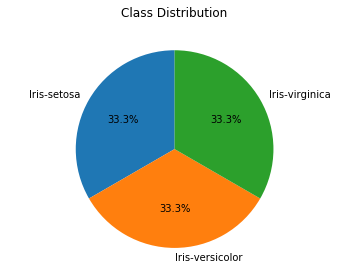

In [307]:
class_dist = irisdf.groupby('class').size()
labels = 'Iris-setosa','Iris-versicolor', 'Iris-virginica'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

* Extract features and labels from the dataframe

In [308]:
irisFeatures = irisdf.values[:, 0:4]
irisLabels = irisdf.values[:, 4]

* Split data for training and testing

In [309]:
X_train, X_test, y_train, y_test = train_test_split(irisFeatures, irisLabels, test_size=0.25, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* Perform classification using Decision Trees

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


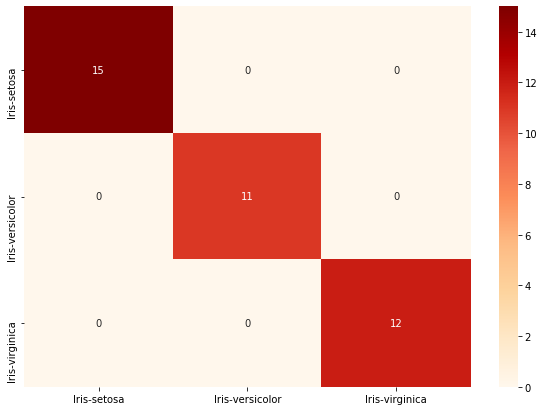

In [310]:
dtClf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
y_pred = dtClf.fit(X_train, y_train).predict(X_test)

# Visualize confusion matrix as a heat map
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (dtClf.score(X_test, y_test)*100))

* Perform Naive Bayes classification

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


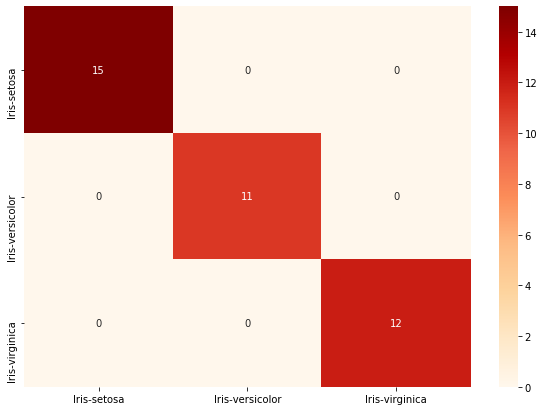

In [311]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heat map
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (gnb.score(X_test, y_test)*100))

* Perform SVM Classification 

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


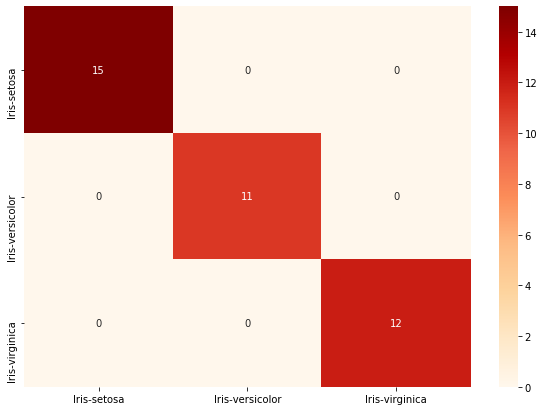

In [312]:
clfSVM = svm.SVC()
y_pred = clfSVM.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heat map
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (clfSVM.score(X_test, y_test)*100))

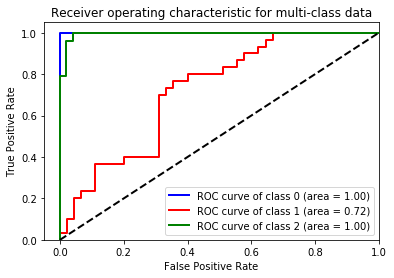

In [354]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Homework-3: Implement a Linear Discriminant analysis to classify diabets dataset. The dataset can be downloaded from  https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/hw03/dataset_37_diabetes.csv  .

* Read diabetes data from CSV

In [342]:
diabetesdf = pd.read_csv('dataset_37_diabetes.csv')

diabetesdf.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


* Convert labels to binary

In [343]:
d = {'tested_negative': 0, 'tested_positive': 1, }

diabetesdf['class'] = diabetesdf['class'].map(d)

diabetesdf.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Check  distribution of data

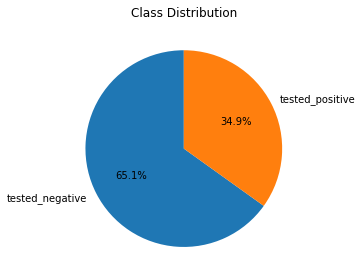

In [344]:
class_dist = diabetesdf.groupby('class').size()
labels = 'tested_negative', 'tested_positive'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

* Check correlation of data

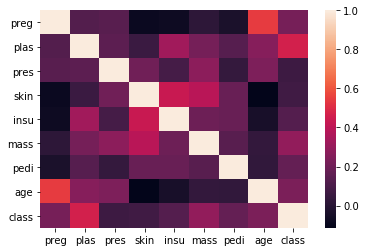

In [345]:
corr=diabetesdf.corr()
sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

* Extract features and labels

In [346]:
# Get data and labels from the df
diabetesFeatures = diabetesdf.values[:, 0:8]
diabetesLabels = diabetesdf.values[:, 8]

* Apply standard scaling to the dataset

In [347]:
# Apply std scaler
scaler = StandardScaler()
diabetestFeatures = scaler.fit_transform(diabetestFeatures)

* Split data for training and testing

In [348]:
X_train, X_test, y_train, y_test = train_test_split(diabetestFeatures, diabetesLabels, test_size=0.2, random_state=0, shuffle=True)
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

* Perform classification using Random Forest

precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.79      0.57      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.82      0.82      0.82       154

Test accuracy: 82.47%


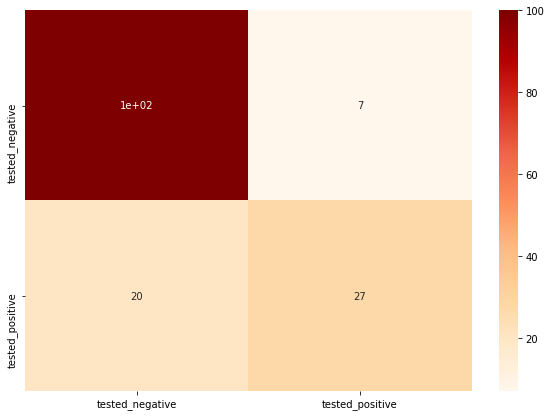

In [349]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heat map
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['tested_negative', 'tested_positive']],
              columns = [i for i in ['tested_negative', 'tested_positive']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (classifier.score(X_test, y_test)*100))

* Plot ROC Curve for the Random Forrest Classifier

Random Forest: ROC AUC=0.866


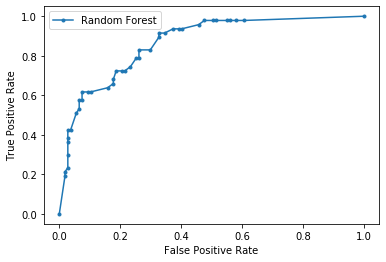

In [353]:
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()